In [6]:
import pandas as pd

In [7]:
fem_act_df = pd.read_csv('../dsc106-project3/data/fem_act.csv')
fem_temp_df = pd.read_csv('../dsc106-project3/data/fem_temp.csv')
male_act_df = pd.read_csv('../dsc106-project3/data/male_act.csv')
male_temp_df = pd.read_csv('../dsc106-project3/data/male_temp.csv')

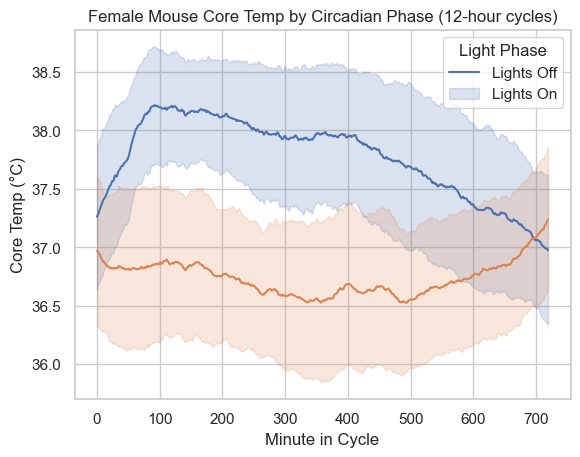

In [8]:
# Circadian Rhythm time series for Female temperature
fem_temp_df["Minute"] = fem_temp_df.index
fem_temp_df["Cycle"] = fem_temp_df["Minute"] // 720
fem_temp_df["Phase"] = fem_temp_df["Cycle"] % 2  # 0 = Lights OFF, 1 = Lights ON
fem_temp_df["MinuteInCycle"] = fem_temp_df["Minute"] % 720

fem_temp_long = fem_temp_df.melt(
    id_vars=["Minute", "Cycle", "Phase", "MinuteInCycle"],
    var_name="MouseID",
    value_name="Temperature"
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.lineplot(data=fem_temp_long, x="MinuteInCycle", y="Temperature", hue="Phase", errorbar='sd')
plt.title("Female Mouse Core Temp by Circadian Phase (12-hour cycles)")
plt.xlabel("Minute in Cycle")
plt.ylabel("Core Temp (°C)")
plt.legend(title="Light Phase", labels=["Lights Off", "Lights On"])
plt.show()